# Daily Cases Trend for COVID19 data

## Visualizing the trend of daily cases for specific country

**1. Installing necessary Dependencies**

In [1]:
import pandas as pd
pd.set_option('max_rows',20)
import plotly.express as px
import plotly.io as pio
#print(pio.renderers)
# pio.renderers.default = "browser"
import matplotlib.pyplot as plt

In [2]:
CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
DEAD_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

**2. Getting the data into dataframes**

In [3]:
covid_confirmed_ts = pd.read_csv(CONFIRMED_URL)
covid_recovered_ts = pd.read_csv(RECOVERED_URL)
covid_dead_ts = pd.read_csv(DEAD_URL)

In [4]:
conf_ts = covid_confirmed_ts
conf_ts.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,157745,157787,157797,157816,157841,157878,157887,157895,157951,157967
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,205549,205777,205897,206273,206616,206935,207221,207542,207709,207709
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,214330,214592,214835,215145,215430,215723,216098,216376,216637,216930
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,20549,20549,21062,21062,21372,21571,21730,21730,21730,22332
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,65868,65938,66086,66566,67199,68362,70221,71142,71752,71752


**3. Filtering Data for a specific country**

In [5]:
conf_ts_cntry = conf_ts[conf_ts['Country/Region']=='United Kingdom']
conf_ts_cntry.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21
259,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,1592,1592,1629,1629,1629,1629,1646,1646,1646,1646
260,Bermuda,United Kingdom,32.307800,-64.750500,0,0,0,0,0,0,...,5815,5815,5917,5917,5917,6014,6014,6014,6014,6014
261,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,...,2886,2886,2886,2886,2886,3016,3016,3016,3016,3071
262,Cayman Islands,United Kingdom,19.313300,-81.254600,0,0,0,0,0,0,...,8097,8097,8097,8245,8245,8386,8386,8386,8386,8386
263,Channel Islands,United Kingdom,49.372300,-2.364400,0,0,0,0,0,0,...,21667,21667,22304,22580,22876,23188,23627,23627,23627,23627
264,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,83,83,83,83,83,83,83,83,83,83
265,Gibraltar,United Kingdom,36.140800,-5.353600,0,0,0,0,0,0,...,7778,7822,7843,7902,7954,8014,8084,8142,8142,8220
266,Isle of Man,United Kingdom,54.236100,-4.548100,0,0,0,0,0,0,...,13037,13097,13154,13258,13364,13401,13425,13438,13438,13451
267,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,44,44,45,45,45,45,45,45,45,45
268,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


**4. Transposing the time series**

In [6]:
conf_ts_cntry.T[4:]

,259,260,261,262,263,264,265,266,267,268,269,270
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12/23/21,1629,6014,3016,8386,23188,83,8014,13401,45,4,3208,11769921
12/24/21,1646,6014,3016,8386,23627,83,8084,13425,45,4,3219,11891292
12/25/21,1646,6014,3016,8386,23627,83,8142,13438,45,4,3235,11891292
12/26/21,1646,6014,3016,8386,23627,83,8142,13438,45,4,3235,11891292


**4. Aggregating multiple columns**

In [7]:
conf_ts_cntry.T[4:].sum(axis='columns')

1/22/20            0.0
1/23/20            0.0
1/24/20            0.0
1/25/20            0.0
1/26/20            0.0
               ...    
12/23/21    11836909.0
12/24/21    11958841.0
12/25/21    11958928.0
12/26/21    11958928.0
12/27/21    12277814.0
Length: 706, dtype: float64

**5. Get the first difference series to get daily delta**

In [8]:
conf_ts_cntry.T[4:].sum(axis='columns').diff()

1/22/20          NaN
1/23/20          0.0
1/24/20          0.0
1/25/20          0.0
1/26/20          0.0
              ...   
12/23/21    123255.0
12/24/21    121932.0
12/25/21        87.0
12/26/21         0.0
12/27/21    318886.0
Length: 706, dtype: float64

**6. Plot**

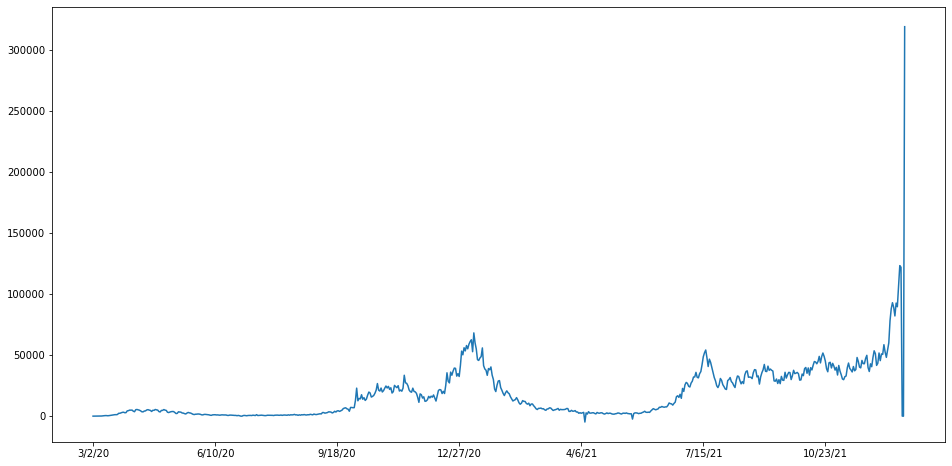

In [9]:
myplot = conf_ts_cntry.T[4:].sum(axis='columns').diff()[40:].plot(figsize=(16,8))

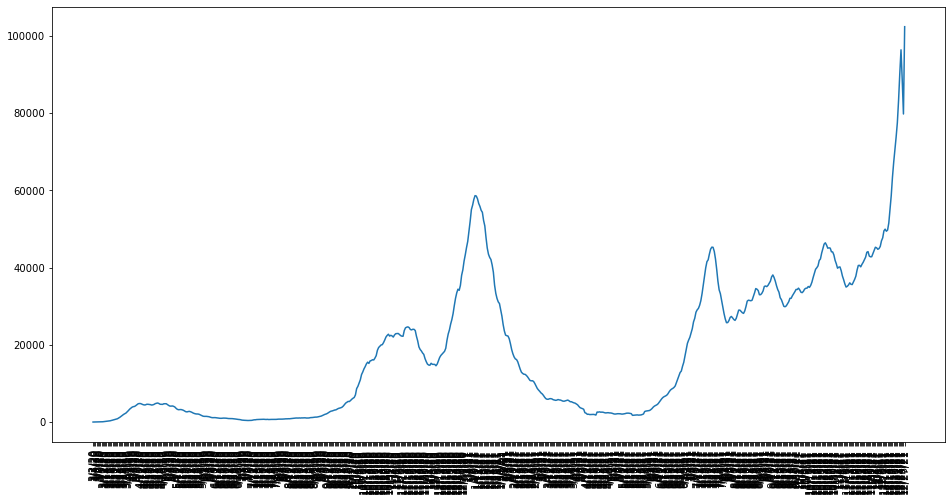

In [10]:
plt.figure(figsize=(16,8))
plt.plot(conf_ts_cntry.T[4:].sum(axis='columns').diff().rolling(window=10).mean()[40:]);
plt.xticks(rotation=90);

**Create Function**

In [11]:
def plot_covid_ma(data,cntry='US',window=3):
    conf_ts = data
    conf_ts_cntry = conf_ts[conf_ts['Country/Region']==cntry]
    myplot = conf_ts_cntry.T[4:].sum(axis='columns').diff().rolling(window=window).mean()[40:].plot(figsize=(10,8),title='Daily Cases Trend for {}'.format(cntry),legend=False,color='maroon')
    return myplot

### 7. Confirmed Cases Trend

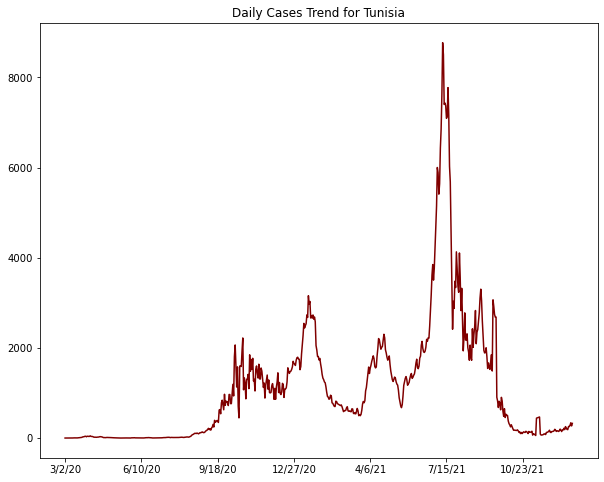

In [13]:
plot_covid_ma(data=covid_confirmed_ts,cntry='Tunisia',window=5);

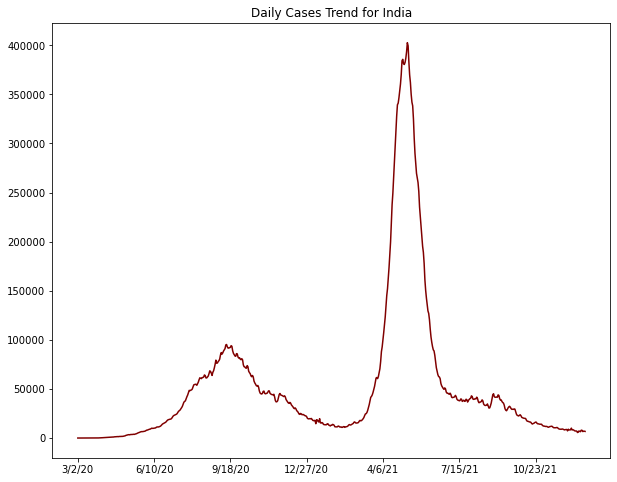

In [15]:
plot_covid_ma(data=covid_confirmed_ts,cntry='India',window=5);

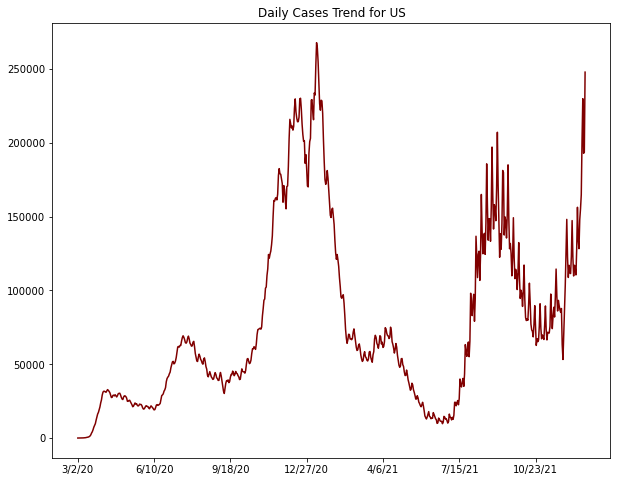

In [16]:
plot_covid_ma(data=covid_confirmed_ts,cntry='US',window=5);

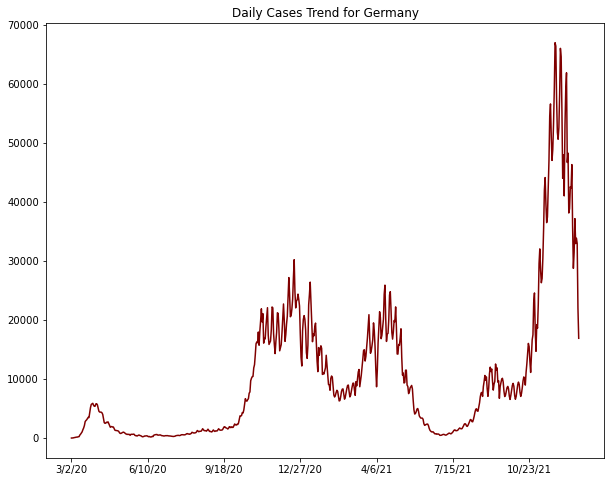

In [17]:
plot_covid_ma(data=covid_confirmed_ts,cntry='Germany',window=5);

### 8. Deaths

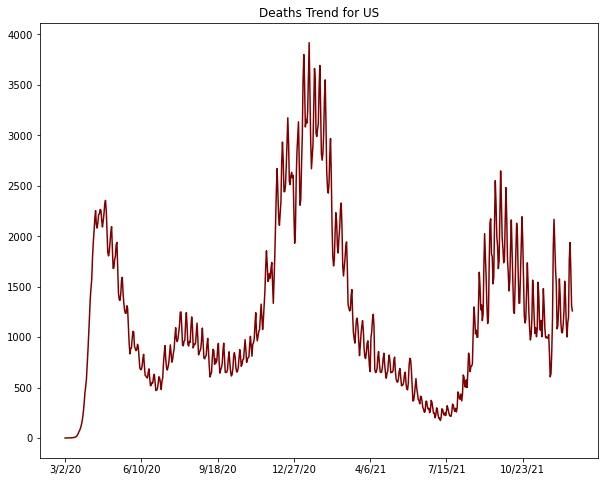

In [18]:
plot_covid_ma(data=covid_dead_ts,cntry='US',window=5);
plt.title('Deaths Trend for US');

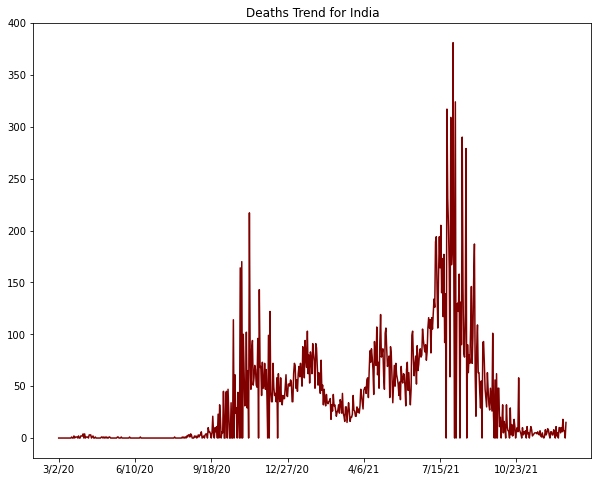

In [19]:
plot_covid_ma(data=covid_dead_ts,cntry='Tunisia',window=1);
plt.title('Deaths Trend for India');

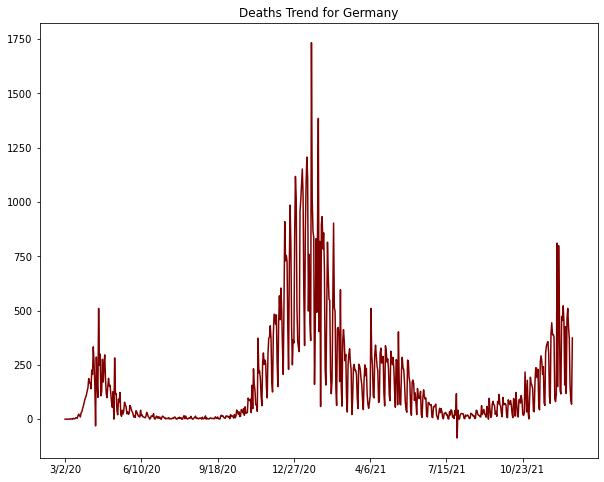

In [20]:
plot_covid_ma(data=covid_dead_ts,cntry='Germany',window=1);
plt.title('Deaths Trend for Germany');
#Population of Germany = 83 Million
#Population of US = 328 Million (almost 4 times)

### 9. Using Plotly

In [21]:
def process_data(data,cntry='Tunisia',window=3):
    conf_ts = data
    conf_ts_cntry = conf_ts[conf_ts['Country/Region']==cntry]
    final_dataset = conf_ts_cntry.T[4:].sum(axis='columns').diff().rolling(window=window).mean()[40:]
    df = pd.DataFrame(final_dataset,columns=['Total'])
    return df

In [22]:
df = process_data(data=covid_confirmed_ts,cntry='Tunisia',window=3)
df.head(10)

,Total
3/2/20,0.000000
3/3/20,0.000000
3/4/20,0.333333
3/5/20,0.333333
3/6/20,0.333333
3/7/20,0.000000
3/8/20,0.333333
3/9/20,0.333333
3/10/20,1.333333
3/11/20,1.666667


In [24]:
pio.renderers.default = "plotly_mimetype"
fig = px.line(df, y='Total', x=df.index, title='Daily confirmed cases trend')
fig.update_layout(title_x=0.5)
fig.show()

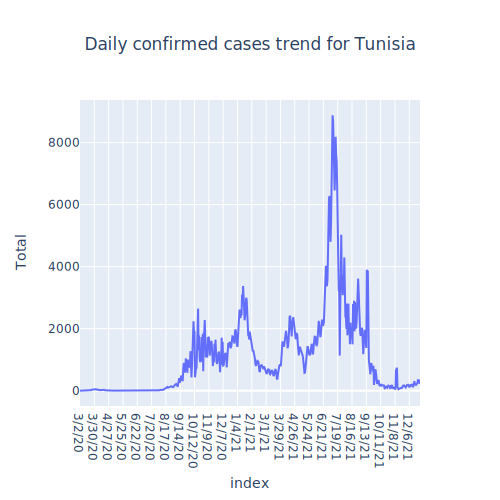

In [26]:
fig = px.line(df, y='Total', x=df.index, title='Daily confirmed cases trend for Tunisia',width=500)
fig.update_layout(title_x=0.5)
fig.show("svg") #scalable vector graphics
#fig.show("png") #Portable Network graphics

In [27]:
pio.renderers.default = "browser"
fig = px.line(df, y='Total', x=df.index, title='Daily confirmed cases trend')
fig.update_layout(title_x=0.5)
fig.show()